# Munich Transportation Network
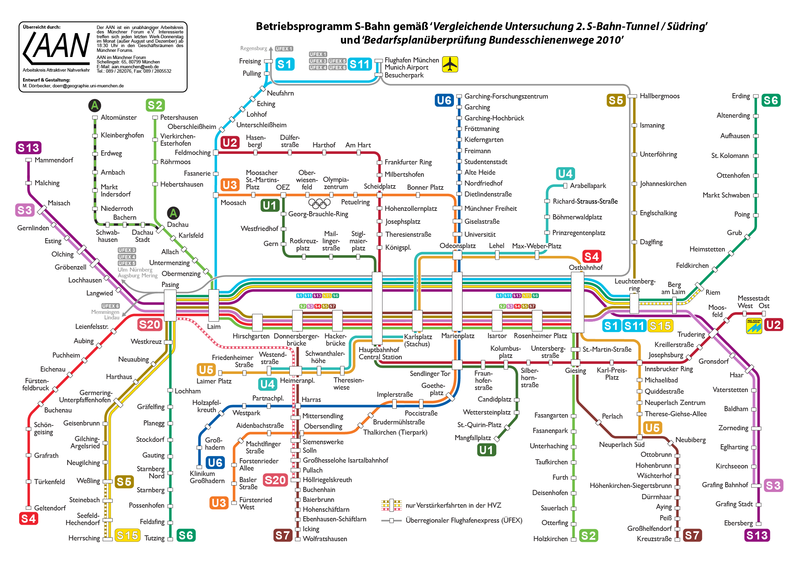

# Data Set
https://en.wikipedia.org/wiki/Trams_in_Munich
https://en.wikipedia.org/wiki/Munich_U-Bahn
https://en.wikipedia.org/wiki/Munich_S-Bahn

# Files
UBahn.csv - SBahn.csv - Trams.csv

In [ ]:
################### UTILITY #########################
""" In Terminal: pip install networkx matplotlib pandas scipy"""
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def format_name(name, limit):
    name = name.strip()    # remove empty space at start and end if exists
    if len(name) > limit:
        return name[:limit] + '..'
    else:
        return name

def append_csv_to_routes(csv_file, routes,route_names):
    df = pd.read_csv(csv_file)
    new_routes = df.values.tolist()
    
    for i in range(len(new_routes)):
        route_names.append(new_routes[i].pop(0))
        new_routes[i] = new_routes[i][0].split(',')
        new_routes[i] = [format_name(station,10) for station in new_routes[i]]
    
    routes.extend(new_routes)
    return routes, route_names


In [ ]:
##################### GRAPH/NETWOK CONSTRUCTION ####################
routes = []
route_names = []
G = nx.Graph()

append_csv_to_routes('UBahn.csv',routes,route_names)
# append_csv_to_routes('SBahn.csv',routes,route_names)
# append_csv_to_routes('Trams.csv',routes,route_names)

for route in routes:
    ##### Add nodes

for route in routes:
    ##### Add edges

print('Number of nodes (stations):', len(G.nodes()))
print("Stations: ",G.nodes())
print('Number of edges (Connections): ', len(G.edges))
print('Edges: ', G.edges)

In [ ]:
############ FIRST VISUALISATION ####################
plt.figure(figsize=(10,10))
# draw edges

nx.draw(G, font_size=10, font_color='black', node_size=1000, node_color='lightblue', edge_color='gray', pos=nx.spring_layout(G))
nx.draw_networkx_labels(G, pos=nx.spring_layout(G), labels={node:node for node in G.nodes()}, font_size=8)

plt.show()


In [ ]:
############### DEGREE ANALYSIS ###########################

print('Graph Density: ', nx.density(G))
# print nodes in G
degrees = sorted(((n,d) for n, d in G.degree()), key=lambda x:x[1], reverse=True)
print("degrees:",degrees)

degree_distribution = {}
for node, degree in degrees:
    ##### fill degree distribution
    if degree not in degree_distribution:
        #####
    else:
        #####

print(sorted(degree_distribution.items()))

plt.bar(degree_distribution.keys(), degree_distribution.values())
plt.title('Degree Distribution (# Routes vs. # Neighbors)')

clustering = nx.clustering(G)
##### filter to nodes with clustering>0
filtered_clustering = {node: coeff for node, coeff in clustering.items() if coeff > 0}
print("\nClustering:\n", filtered_clustering)


In [ ]:
############### DISTANCE ANALYSIS ###########################

diameter = nx.diameter(G)
print("\nDiameter:",diameter)

paths_lengths = dict(nx.all_pairs_shortest_path_length(G))
# make histogram for number of paths of given lengths
lengths_distribution = {}
for origin in paths_lengths:
    for destination in paths_lengths[origin]:
        length = paths_lengths[origin][destination]
        if length not in lengths_distribution:
            lengths_distribution[length] = 1
        else:
            lengths_distribution[length] += 1

print("Distance_distribution:", lengths_distribution)
plt.bar(lengths_distribution.keys(), lengths_distribution.values())
plt.title('Distance Distribution (number of routes vs. distance)')

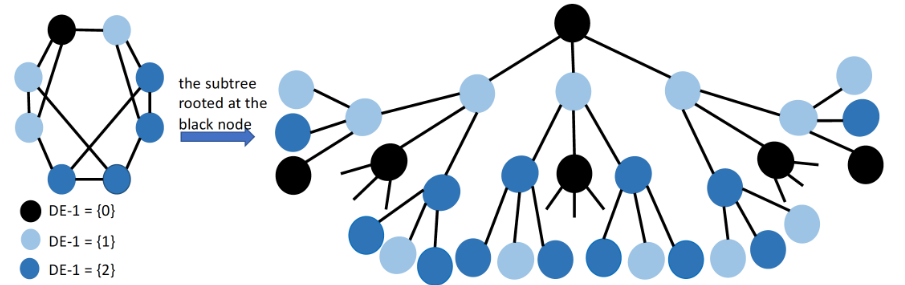

In [ ]:
############### CENTRALITY ANALYSIS ###########################

# Compute degree centrality
##### closeness_centrality = 
##### sorted_closeness_centrality = 
print("\nCloseness Centrality:", sorted_closeness_centrality)

# Compute betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x:x[1], reverse=True)
print("Betweenness Centrality:", sorted_betweenness_centrality)

# Compute link betweenness centrality
edge_betweenness_centrality = nx.edge_betweenness_centrality(G)
sorted_edge_betweenness_centrality = sorted(edge_betweenness_centrality.items(), key=lambda x:x[1], reverse=True)
print("Edge Betweenness Centrality:", sorted_edge_betweenness_centrality)

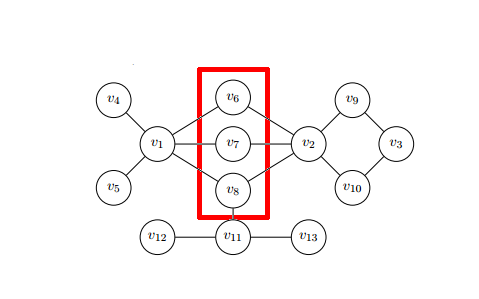

In [ ]:
import matplotlib.colors as mcolors
# Normalize edge betweenness values for color mapping
max_centrality = max(edge_betweenness_centrality.values())
min_centrality = min(edge_betweenness_centrality.values())
normalized_centrality = {e: (c - min_centrality) / (max_centrality - min_centrality) for e, c in edge_betweenness_centrality.items()}

# Create a color map
cmap = plt.get_cmap('viridis')

# Draw the network
##### positions = 

# Draw edges with colors based on edge betweenness centrality
##### nx.draw_networkx_edges(

# Show plot
plt.show()

In [ ]:
# Normalize closeness centrality values for color mapping
max_closeness = max(closeness_centrality.values())
min_closeness = min(closeness_centrality.values())
normalized_closeness = {node: (centrality - min_closeness) / (max_closeness - min_closeness) for node, centrality in closeness_centrality.items()}

# Create a color map
cmap = plt.get_cmap('plasma')  # Using a different colormap for distinction

# Draw the network
# Draw nodes with colors based on closeness centrality
nx.draw_networkx_nodes(G, positions, node_size=80, cmap=cmap, node_color=[normalized_closeness[node] for node in G.nodes()])
# nx.draw_networkx_labels(G, positions, font_size=6)
nx.draw_networkx_edges(G, positions, edge_color='gray', width=1)  # Drawing edges in gray for better contrast

plt.show()

In [ ]:
# Normalize betweenness centrality values for node size mapping
max_betweenness = max(betweenness_centrality.values())
min_betweenness = min(betweenness_centrality.values())
normalized_betweenness = {node: 50 + 200 * np.sqrt((centrality - min_betweenness) / (max_betweenness - min_betweenness)) for node, centrality in betweenness_centrality.items()}

# Use normalized betweenness centrality for node sizes
node_sizes = [normalized_betweenness[node] for node in G.nodes()]

# Draw the network with node sizes proportional to betweenness centrality
nx.draw_networkx_nodes(G, positions, node_size=node_sizes, cmap=cmap, node_color=[normalized_closeness[node] for node in G.nodes()])
nx.draw_networkx_edges(G, positions, edge_color='gray', width=1)  # Drawing edges in gray for better contrast

plt.show()